# **FIFA 22 EDA**

###  Importing Libraries and dataset from FIFA 22 dataset




In [ ]:
import pandas as pd
df = pd.read_csv('/content/Fifa 22 players.csv')
print(df)

       sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1         188545  https://sofifa.com/player/188545/robert-lewand...   
2          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3         190871  https://sofifa.com/player/190871/neymar-da-sil...   
4         192985  https://sofifa.com/player/192985/kevin-de-bruy...   
...          ...                                                ...   
19234     261962  https://sofifa.com/player/261962/defu-song/220002   
19235     262040  https://sofifa.com/player/262040/caoimhin-port...   
19236     262760  https://sofifa.com/player/262760/nathan-logue/...   
19237     262820  https://sofifa.com/player/262820/luke-rudden/2...   
19238     264540  https://sofifa.com/player/264540/emanuel-lalch...   

               short_name                            long_name  \
0                L. Messi       Lionel Andrés Messi Cuccittini   
1          R. L

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


### Functions used for data cleaning and data analysis

In [ ]:
#display top 5 rows of the dataset
df.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [ ]:
#display bottom 5 rows of the dataset
df.tail()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,???,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19238,264540,https://sofifa.com/player/264540/emanuel-lalch...,E. Lalchhanchhuaha,Emanuel Lalchhanchhuaha,CAM,47,60,110000.0,500.0,19,...,41+2,41+2,41+2,45+2,16+2,https://cdn.sofifa.net/players/264/540/22_120.png,https://cdn.sofifa.net/teams/113040/60.png,https://cdn.sofifa.net/flags/in.png,NaN,https://cdn.sofifa.net/flags/in.png


In [ ]:
df.shape

(19239, 110)

In [ ]:
df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)

In [ ]:
df.dtypes

sofifa_id            int64
player_url          object
short_name          object
long_name           object
player_positions    object
                     ...  
player_face_url     object
club_logo_url       object
club_flag_url       object
nation_logo_url     object
nation_flag_url     object
Length: 110, dtype: object

In [ ]:
#Display Descriptive Summary of the dataset
df.describe()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,...,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000
mean,231468.086959,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,...,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962
std,27039.717497,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,...,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563
min,41.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,...,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,214413.500000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,...,50.000000,29.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,27.000000
50%,236543.000000,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,1938.000000,1.000000,...,59.000000,52.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,36.000000
75%,253532.500000,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,186.000000,80.000000,111139.000000,1.000000,...,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,45.000000
max,264640.000000,93.000000,95.000000,1.940000e+08,350000.000000,54.000000,206.000000,110.000000,115820.000000,5.000000,...,96.000000,93.000000,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000,65.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB


In [ ]:
# To Check null values
df.isnull()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
19235,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
19236,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
19237,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
df.isnull().sum()

sofifa_id               0
player_url              0
short_name              0
long_name               0
player_positions        0
                    ...  
player_face_url         0
club_logo_url          61
club_flag_url          61
nation_logo_url     18480
nation_flag_url         0
Length: 110, dtype: int64

In [ ]:
#Remove irrelevant columns from the dataset 
useless_columns = ['player_url','long_name','dob','club_loaned_from','nation_position','nation_jersey_number','body_type','real_face','player_face_url','club_logo_url','club_flag_url','nation_logo_url','nation_flag_url','player_tags','nation_team_id']
df = df.drop(useless_columns, axis=1)


In [ ]:
print(df.columns)

Index(['sofifa_id', 'short_name', 'player_positions', 'overall', 'potential',
       'value_eur', 'wage_eur', 'age', 'height_cm', 'weight_kg',
       'club_team_id', 'club_name', 'league_name', 'league_level',
       'club_position', 'club_jersey_number', 'club_joined',
       'club_contract_valid_until', 'nationality_id', 'nationality_name',
       'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'release_clause_eur',
       'player_traits', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'pow

In [ ]:
df['preferred_foot'].value_counts()

Right    14674
Left      4565
Name: preferred_foot, dtype: int64

In [ ]:
df['work_rate'].value_counts()

Medium/Medium    10015
High/Medium       3661
Medium/High       1880
High/High         1099
Medium/Low         810
High/Low           808
Low/Medium         466
Low/High           455
Low/Low             45
Name: work_rate, dtype: int64

In [ ]:
df['nationality_name'].value_counts()

England             1719
Germany             1214
Spain               1086
France               980
Argentina            960
                    ... 
Ethiopia               1
Papua New Guinea       1
Kyrgyzstan             1
Guam                   1
Indonesia              1
Name: nationality_name, Length: 163, dtype: int64

In [ ]:
x = df['league_name'].value_counts().head(10)
print(x)

USA Major League Soccer          771
Argentina Primera División       727
English League Championship      717
English Premier League           652
Spain Primera Division           633
English League One               626
Spanish Segunda División         625
English League Two               613
Japanese J. League Division 1    589
French Ligue 1                   577
Name: league_name, dtype: int64


In [ ]:
df['skill_moves'].value_counts()

2    9481
3    6393
1    2132
4    1179
5      54
Name: skill_moves, dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.nunique()

sofifa_id           19239
short_name          18145
player_positions      674
overall                47
potential              46
                    ...  
lcb                   259
cb                    259
rcb                   259
rb                    193
gk                    115
Length: 95, dtype: int64

In [ ]:
df['skill_moves'].value_counts()

2    9481
3    6393
1    2132
4    1179
5      54
Name: skill_moves, dtype: int64

### **Data Visualization**

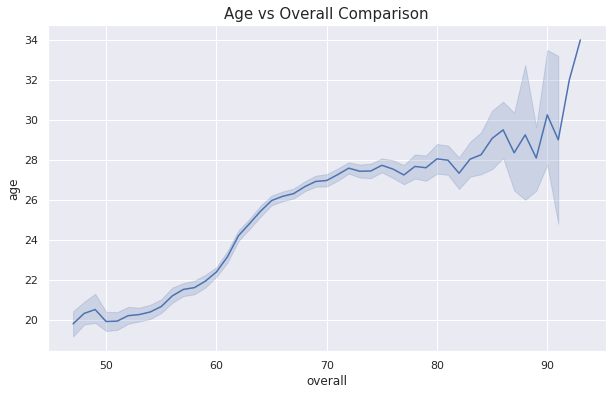

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x="overall", y="age", data=df)
plt.title("Age vs Overall Comparison", size=15)
plt.show()

As show in the above graph the highest overall ratings is between  the age of 34 and 35 while the lowest ratings is at the age of 20 and 21.

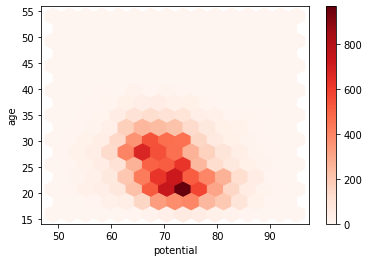

In [ ]:
df.plot.hexbin(x='potential', y='age', gridsize=15, sharex=False, cmap='Reds')

The average potential growth of a player is around 70 and 78.

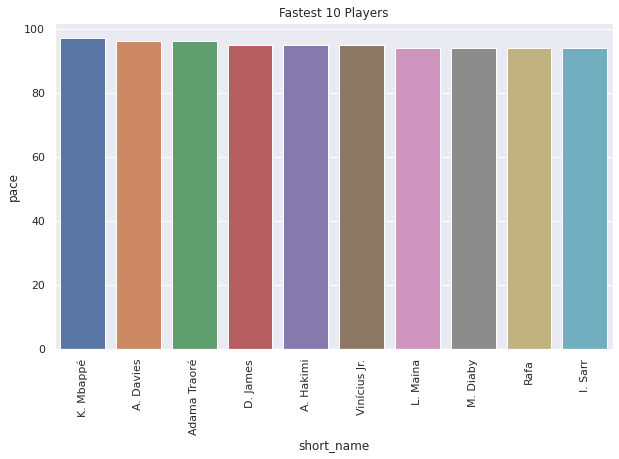

In [ ]:
fast=df.sort_values(by='pace', ascending=False)
fast_10=fast.head(10)
fast_10
sns.set(rc = {'figure.figsize':(10,6)})
ax = sns.barplot(x='short_name', y='pace',data=fast_10)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('Fastest 10 Players')
plt.show()

The above graph shows the 10 fastest players in which Kylian Mbappe has the highest Pace(speed) of 97.  

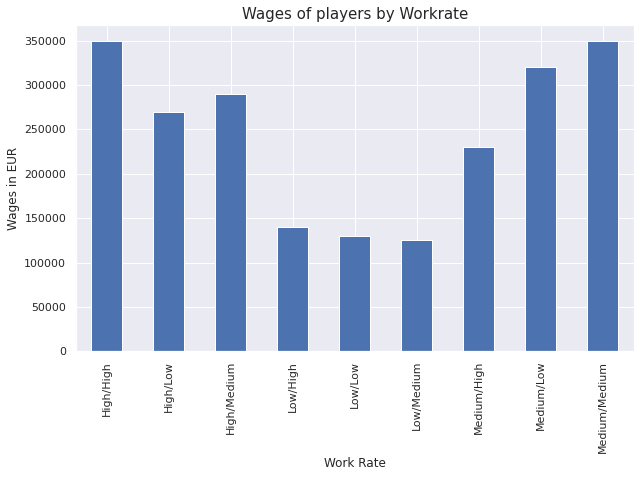

In [ ]:
df.groupby("work_rate")["wage_eur"].max().plot.bar()
plt.xlabel("Work Rate") 
plt.ylabel("Wages in EUR")
plt.title("Wages of players by Workrate", fontsize = 15)
plt.show()

According to the graph\ High/High and Medium/Medium type of workrate players are having the highest salary.

### Analysing the comparison between skill moves,preferred foot and weak foot ratings of each player##

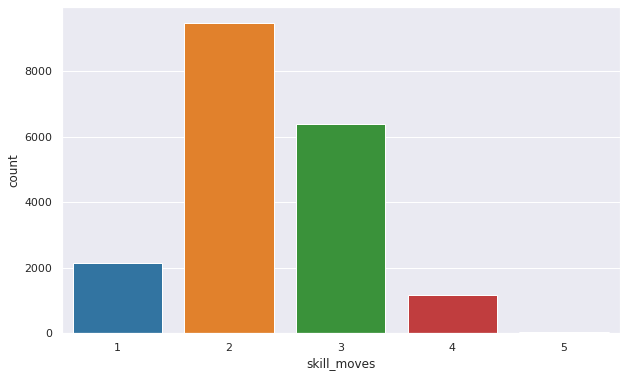

In [ ]:
sns.countplot(x='skill_moves',data=df,palette='tab10')

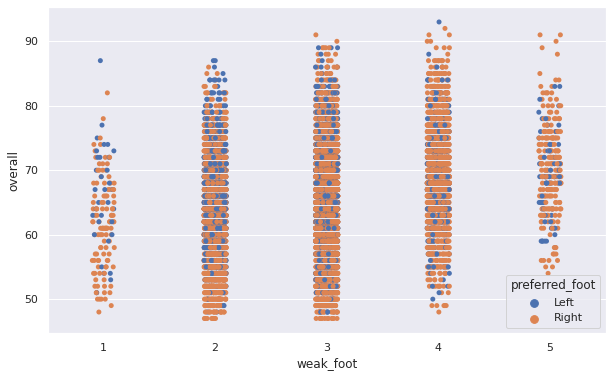

In [ ]:
sns.stripplot(x="weak_foot",y="overall",hue="preferred_foot",data=df )

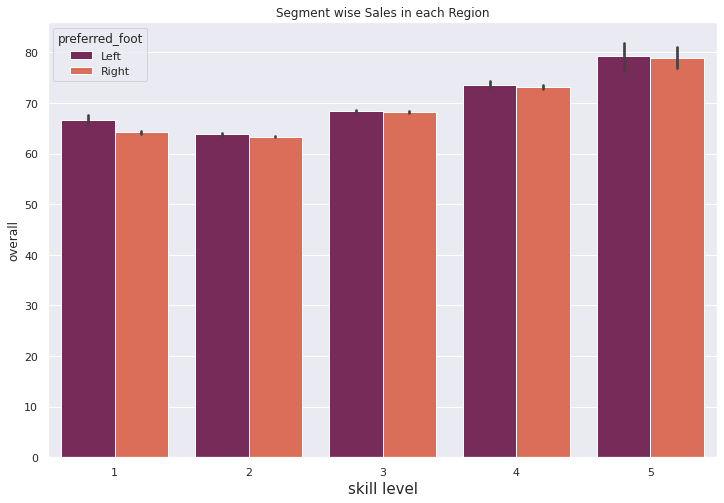

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Segment wise Sales in each Region')
sns.barplot(x='skill_moves', y='overall',data=df, hue='preferred_foot', palette='rocket')
plt.xlabel('skill level', fontsize=15)
plt.show()

Even though there are more players having right foot as there strong foot the most skillful players are left footed players.

### **Comparison between salary and international reputation of each player.**

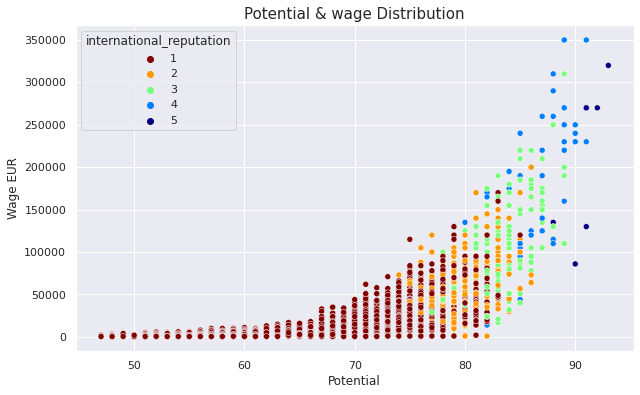

In [ ]:
sns.scatterplot(x =df['overall'], y = df['wage_eur'], hue = df['international_reputation'],palette='jet_r')
plt.xlabel("Potential") 
plt.ylabel("Wage EUR")
plt.title("Potential & wage Distribution", fontsize = 15)
plt.show()

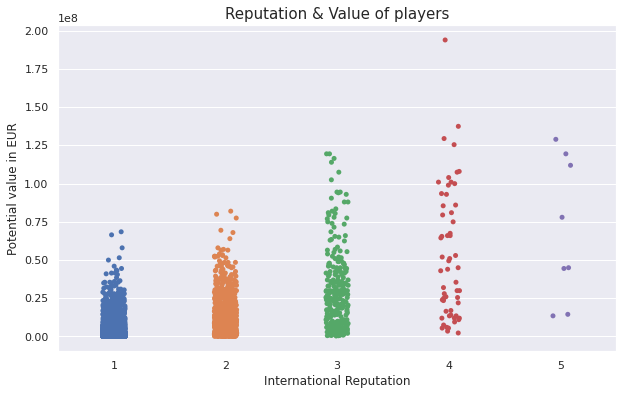

In [ ]:
sns.stripplot(data=df, x="international_reputation", y="value_eur" )
plt.xlabel("International Reputation") 
plt.ylabel("Potential value in EUR")
plt.title("Reputation & Value of players", fontsize = 15)
plt.show()

As expected, there seems to be a correlation between the reputation of players and their wages as the players with high reputational value tend to earn more. 

In [ ]:
player_name = df[['wage_eur','short_name',
                  'value_eur','overall','age',
                  'nationality_name','potential',
                  'international_reputation']].nlargest(10,['wage_eur']).set_index('short_name')
player_name

,wage_eur,value_eur,overall,age,nationality_name,potential,international_reputation
short_name,,,,,,,
K. De Bruyne,350000.0,125500000.0,91,30,Belgium,91,4
K. Benzema,350000.0,66000000.0,89,33,France,89,4
L. Messi,320000.0,78000000.0,93,34,Argentina,93,5
Casemiro,310000.0,88000000.0,89,29,Brazil,89,3
T. Kroos,310000.0,75000000.0,88,31,Germany,88,4
R. Sterling,290000.0,107500000.0,88,26,England,89,4
R. Lewandowski,270000.0,119500000.0,92,32,Poland,92,5
Cristiano Ronaldo,270000.0,45000000.0,91,36,Portugal,91,5
Neymar Jr,270000.0,129000000.0,91,29,Brazil,91,5


Here, players having High International reputation are having the highest salary.

In [ ]:
from collections import Counter
bar_plot = dict(Counter(df['nationality_name'].values).most_common(5))
bar_plot

{'England': 1719,
 'Germany': 1214,
 'Spain': 1086,
 'France': 980,
 'Argentina': 960}

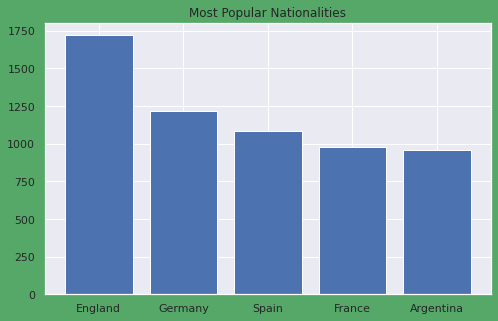

In [ ]:
# Display the nations which most players are representing
fig, ax = plt.subplots(figsize = (8,5), facecolor='g')
plt.bar(*zip(*bar_plot.items()))
ax.set_title('Most Popular Nationalities')
plt.show()

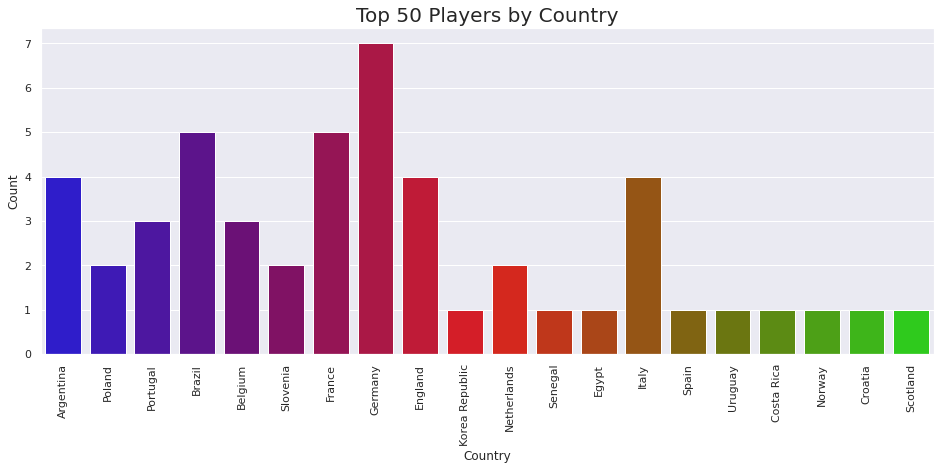

In [ ]:
# Top 50 players Distributed according to their nationalities
plt.figure(figsize=(16,6))
sns.countplot(x='nationality_name', data=df.head(50),palette='brg')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 50 Players by Country', fontsize=20)
plt.show()

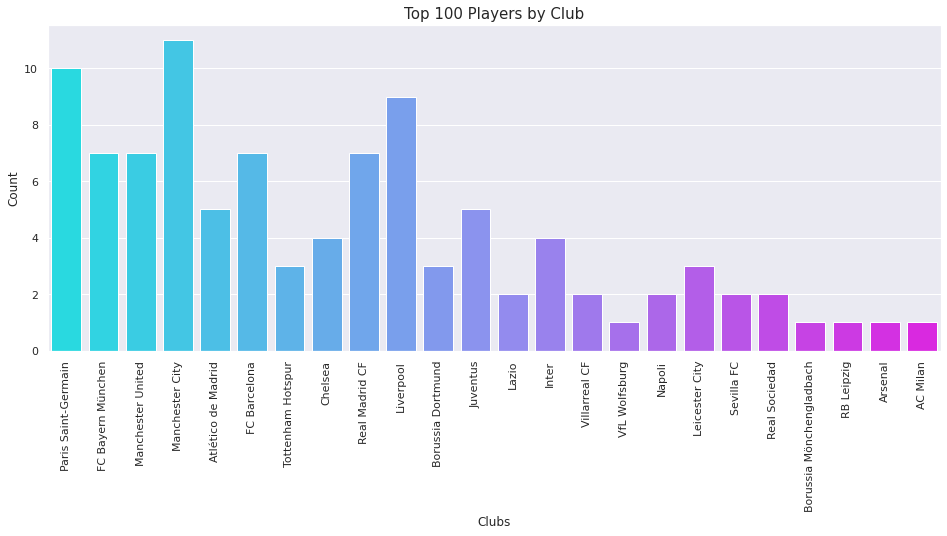

In [ ]:
# Top 100 players Distributed according to their Current Club
plt.figure(figsize=(16,6))
sns.countplot(x='club_name', data=df.head(100),palette='cool')
plt.xticks(rotation=90)
plt.xlabel('Clubs')
plt.ylabel('Count')
plt.title('Top 100 Players by Club', fontsize=15)
plt.show()

In [ ]:
#To find most common player position
def plot_most_common(category):
    bar_plot = dict(Counter(df[category].values).most_common(5))
    plt.bar(*zip(*bar_plot.items()))
    plt.show()

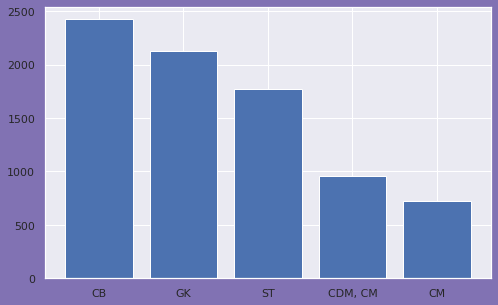

In [ ]:
fig, ax = plt.subplots(figsize = (8,5), facecolor='m')
plot_most_common('player_positions')
plt.show()

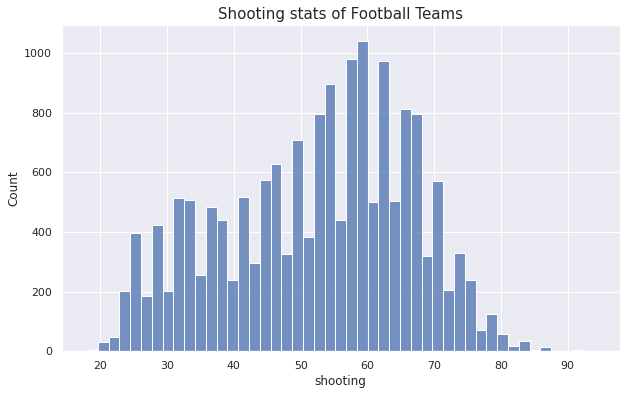

In [ ]:
# To find the average 'Shooting' stat in the dataset.
plt.figure(figsize=(10,6))
sns.histplot(x="shooting", data=df)
plt.title("Shooting stats of Football Teams", size=15)
plt.show()

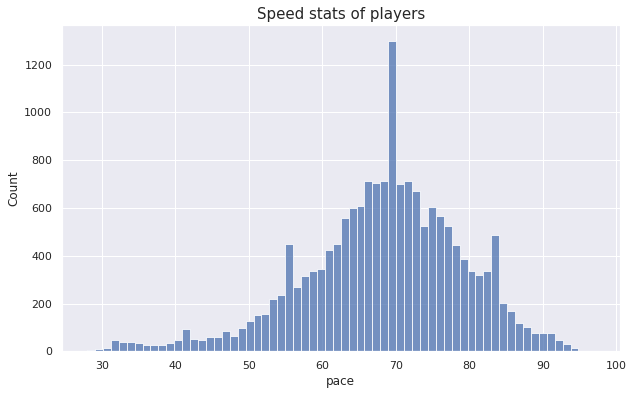

In [ ]:
# To find the average '(Pace)Speed' stat in the dataset.
plt.figure(figsize=(10,6))
sns.histplot(x="pace", data=df)
plt.title("Speed stats of players", size=15)
plt.show()

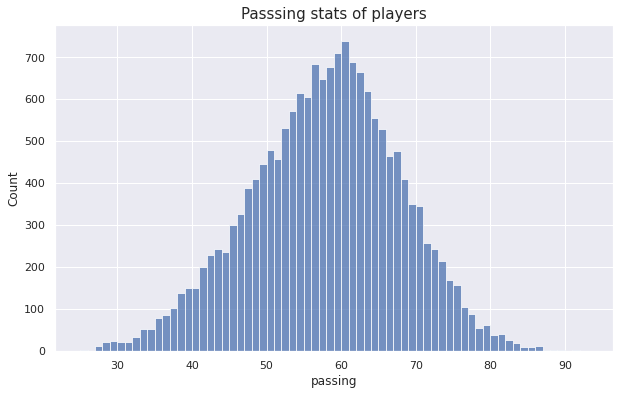

In [ ]:
# To find the average 'Passing' stat in the dataset.
plt.figure(figsize=(10,6))
sns.histplot(x="passing", data=df)
plt.title("Passing stats of players", size=15)
plt.show()

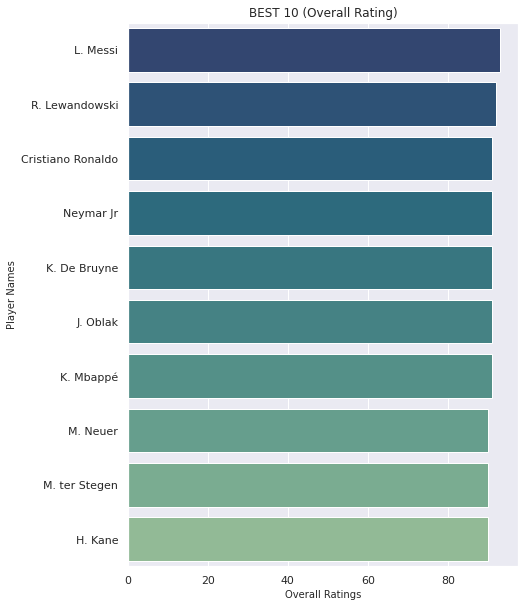

In [ ]:
#The Best 10 Players of FIFA 22 dataset
x = df['short_name'].head(10) 
y = df['overall'].head(10)

# plot
plt.figure(figsize=(7,10))


ax= sns.barplot(x=y, y=x, palette = 'crest_r', orient='h')
plt.xticks()
plt.xlabel('Overall Ratings', size = 10) 
plt.ylabel('Player Names', size = 10 ) 
plt.title('BEST 10 (Overall Rating)')

plt.show()

By looking at the graph Lionel Messi has the highest overall rating of 93.

Conclusion:
From the analysis of FIFA 22 dataset, we can conclude that;\
1] Average peak performance of a football player is between 73 to 81. \
 
2] The 'Potential' of a player depends on the work rate of that player.\
3] The Fastest Footballer having 'PACE' - 97 is KYLIAN MBAPPE.\
4] There is an effect in the salary of a player depending upon his work rate.  \
5] International reputation plays a major role in the salary of a football player.\
6] Majority of the football players are right footed.\
7] Compared to Right footed players,left prefeered foot are the most skillful by a small margin.\
8] Kevin De Bryune is currently the highest paid footballer.\
9]  England have the most representation among countries in the data, followed by Germany.\
10] However among the top 50 players, this is not the case.
    Germany has 7 players inside top 50,followed by Brazil and France.\
11] Manchester City produces the highest amount of players(11) inside the Top 100.
Followed by PSG(Paris Saint-German) - 10\
            Liverpool - 9\
12] Average Shooting,Speed,Passing stat ranges from    
Shooting - 50 to 70\
Pace - 65 to 75\
Passing - 55 to 65\
13] Messi is the best overall rated player.